<a href="https://colab.research.google.com/github/novrian6/cnn-multiclass-classification/blob/main/CNN_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass image classification
1.   Become with the data
2.   Preprocess data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameter to improve mode
7. Repeat until satisfied

In [ ]:
#ref : https://github.com/mrdbourke/tensorflow-deep-learning

In [ ]:
#download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-03-20 14:22:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 172.217.193.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.3MB/s    in 7.2s    

2024-03-20 14:22:28 (68.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
#unzip data
import zipfile
zip_ref= zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

##1. Become one with Data


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

there are 2 directories and 0 in 10_food_classes_all_data
there are 10 directories and 0 in 10_food_classes_all_data/test
there are 0 directories and 250 in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 in 10_food_classes_all_data/test/steak
there are 0 directories and 250 in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 in 10_food_classes_all_data/test/grilled_salmon
there are 10 directories and 0 in 10_food_classes_all_data/train
there are 0 directories and 750 in 10_food_classes_all_data/train

In [ ]:
!ls -la

total 507044
drwxr-xr-x 1 root root      4096 Mar 20 14:22 .
drwxr-xr-x 1 root root      4096 Mar 20 14:17 ..
drwxr-xr-x 4 root root      4096 Mar 20 14:22 10_food_classes_all_data
-rw-r--r-- 1 root root 519183241 Feb 16  2021 10_food_classes_all_data.zip
drwxr-xr-x 4 root root      4096 Mar 18 13:23 .config
drwxr-xr-x 3 root root      4096 Mar 20 14:22 __MACOSX
drwxr-xr-x 1 root root      4096 Mar 18 13:23 sample_data


In [ ]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Mar 20 14:22 .
drwxr-xr-x  1 root root 4096 Mar 20 14:22 ..
drwxr-xr-x 12 root root 4096 Mar 20 14:22 test
drwxr-xr-x 12 root root 4096 Mar 20 14:22 train


In [ ]:
train_dir= "10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"


In [ ]:
#Lets get the class names
import pathlib
import numpy as np
data_dir= pathlib.Path(train_dir)
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Visualise
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image (target_dir, target_class):
  target_folder = target_dir+target_class

  #get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print (random_image)

  #read in the image and plot it sing matplotlib
  img=mpimg.imread(target_folder +"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print( f"image shape:{img.shape}")
  return img

['578929.jpg']
image shape:(384, 512, 3)


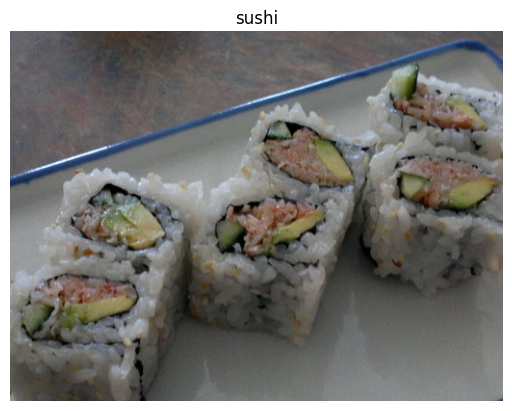

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class= random.choice(class_names))

##2. Preprocess our data

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale
train_datagen = ImageDataGenerator (rescale=1/255.)
test_datagen = ImageDataGenerator(rescale =1/255.)

#load data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


##3.Create a model (start with baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
model_1= Sequential([
    Conv2D(10, 3, activation="relu",input_shape=(224,224,3)),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation ="relu"),
    Conv2D(10,3,activation ="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation ="relu"),
    Conv2D(10,3,activation ="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")

])

model_1.compile( loss=tf.keras.losses.categorical_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
len(test_data)

79

In [ ]:
history_1= model_1.fit(train_data, epochs=10,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 31s 130ms/step - loss: 1.1041 - accuracy: 0.6280 - val_loss: 2.4329 - val_accuracy: 0.3104
Epoch 2/10
235/235 [==============================] - 34s 145ms/step - loss: 0.8504 - accuracy: 0.7156 - val_loss: 2.9423 - val_accuracy: 0.2688
Epoch 3/10
235/235 [==============================] - 31s 131ms/step - loss: 0.6036 - accuracy: 0.8016 - val_loss: 3.6578 - val_accuracy: 0.2812
Epoch 4/10
235/235 [==============================] - 31s 132ms/step - loss: 0.4077 - accuracy: 0.8612 - val_loss: 4.5339 - val_accuracy: 0.2716
Epoch 5/10
235/235 [==============================] - 29s 124ms/step - loss: 0.2758 - accuracy: 0.9087 - val_loss: 5.3393 - val_accuracy: 0.2644
Epoch 6/10
235/235 [==============================] - 31s 130ms/step - loss: 0.2194 - accuracy: 0.9283 - val_loss: 6.8023 - val_accuracy: 0.2600
Epoch 7/10
235/235 [==============================] - 31s 133ms/step - loss: 0.1640 - accuracy: 0.9461 - val_loss: 7.5985 - val_ac

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
import pandas as pd

<Axes: >

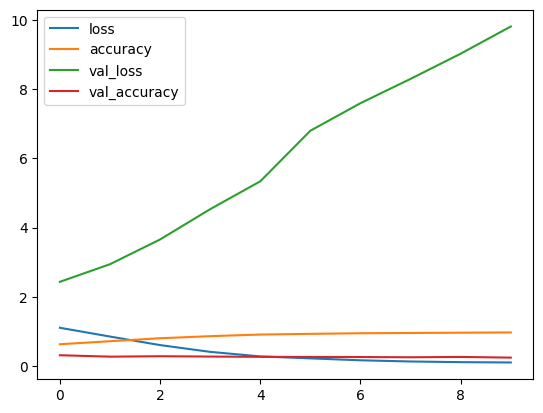

In [ ]:
pd.DataFrame(history_1.history).plot()

In [ ]:
model_1

##Prediction

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

print("result prediction")
# Load the trained model

#model_path = 'path_to_your_trained_model.h5'
#model = load_model(model_path)
model= model_1
# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Path to the test images directory
test_images_dir = "10_food_classes_all_data/predict/"

# Get the list of image files in the test directory
image_files = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith('.jpg')]

# Class labels
class_labels = train_data.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Make predictions for each image
for img_file in image_files:
    img = preprocess_image(img_file)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    filename = os.path.basename(img_file)
    print(f'Image: {filename}, Predicted Class: {predicted_label}')


result prediction
1/1 [==============================] - 0s 20ms/step
Image: chickenwing2.jpg, Predicted Class: chicken_wings
1/1 [==============================] - 0s 18ms/step
Image: chicken_wing1.jpg, Predicted Class: fried_rice
1/1 [==============================] - 0s 21ms/step
Image: hamburger.jpg, Predicted Class: hamburger
